In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [9]:
dataset_path = 'titanic_modified_dataset.csv'
df = pd.read_csv(dataset_path,
                 index_col='PassengerId')

In [10]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Survived
PassengerId,,,,,,,,,
1,3,0,22.0,1,0,7.2500,0,0,0
2,1,1,38.0,1,0,71.2833,1,1,1
3,3,1,26.0,0,0,7.9250,0,2,1
4,1,1,35.0,1,0,53.1000,0,1,1
5,3,0,35.0,0,0,8.0500,0,0,0


In [11]:
dataset_arr = df.to_numpy().astype(np.float64)
X,y = dataset_arr[:,:-1],dataset_arr[:,-1]

In [12]:
intercept = np.ones((X.shape[0],1))
X = np.concatenate((intercept, X), axis=1)

In [41]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=val_size, random_state=random_state,shuffle=is_shuffle)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=test_size, random_state=random_state)


In [42]:
standard = StandardScaler()
X_train[:,1:] = standard.fit_transform(X_train[:,1:])
X_test[:,1:] = standard.transform(X_test[:,1:])
X_val[:,1:] = standard.transform(X_val[:,1:])

In [43]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [44]:
def predict(X, theta):
    dot = np.dot(X, theta)
    y_hat = sigmoid(dot)
    return y_hat

In [45]:
def compute_loss(y_hat, y):
    y_hat = np.clip(y_hat, 1e-7, 1 - 1e-7)
    return (-y*np.log(y_hat)-(1-y)*np.log(1-y_hat)).mean()

In [46]:
def compute_gradient(X, y, y_hat):
    return np.dot(X.T, (y_hat - y))/y.size

In [47]:
def update_theta(theta, gradient, lr):
    new_theta = theta - lr*gradient
    return new_theta

In [48]:
def accuracy(X,y, theta):
    y_hat = predict(X, theta).round()
    acc = (y_hat == y).mean()
    return acc

In [49]:
lr = 0.01
epochs = 100
batch_size = 16

np.random.seed(random_state)
theta = np.random.uniform(size=X_train.shape[1])

In [50]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
    train_batch_accs = []
    train_batch_losses = []
    val_batch_accs = []
    val_batch_losses = []
    
    for i in range(0, X_train.shape[0], batch_size):
        X_i = X_train[i:i+batch_size]
        y_i = y_train[i:i+batch_size]
        y_hat = predict(X_i, theta)
        train_loss = compute_loss(y_hat, y_i)
        gradient = compute_gradient(X_i, y_i, y_hat)
        theta = update_theta(theta, gradient, lr)
        
        train_batch_accs.append(accuracy(X_i, y_i, theta))
        train_batch_losses.append(train_loss)
        
        y_val_hat = predict(X_val, theta)
        val_loss = compute_loss(y_val_hat, y_val)
        val_batch_accs.append(accuracy(X_val, y_val, theta))
        val_batch_losses.append(val_loss)
    
    train_batch_loss = sum(train_batch_losses)/ len(train_batch_losses)
    val_batch_loss = sum(val_batch_losses)/ len(val_batch_losses)
    train_batch_acc = sum(train_batch_accs)/ len(train_batch_accs)
    val_batch_acc = sum(val_batch_accs)/ len(val_batch_accs)
    
    train_losses.append(train_batch_loss)
    train_accs.append(train_batch_acc)
    val_losses.append(val_batch_loss)
    val_accs.append(val_batch_acc)
    print(f'epoch : {epoch+1} | train loss : {train_batch_loss} | train acc : {train_batch_acc} | validation loss : {val_batch_loss} | validation acc : {val_batch_acc}')

epoch : 1 | train loss : 0.7030512842526715 | train acc : 0.6564102564102564 | validation loss : 0.5994866816834135 | validation acc : 0.7104999283770231
epoch : 2 | train loss : 0.6697763929039742 | train acc : 0.6740384615384616 | validation loss : 0.5820187414560264 | validation acc : 0.715227044835983
epoch : 3 | train loss : 0.6403939998515933 | train acc : 0.6852564102564103 | validation loss : 0.5671628487716034 | validation acc : 0.7195244234350379
epoch : 4 | train loss : 0.6144986366111846 | train acc : 0.6996794871794872 | validation loss : 0.5545727802403212 | validation acc : 0.7284056725397507
epoch : 5 | train loss : 0.5917255159145512 | train acc : 0.7028846153846154 | validation loss : 0.5439596026719391 | validation acc : 0.7435897435897437
epoch : 6 | train loss : 0.5717403796104814 | train acc : 0.7318376068376069 | validation loss : 0.5350736412609689 | validation acc : 0.7488898438619106
epoch : 7 | train loss : 0.5542333321647727 | train acc : 0.7478632478632479 

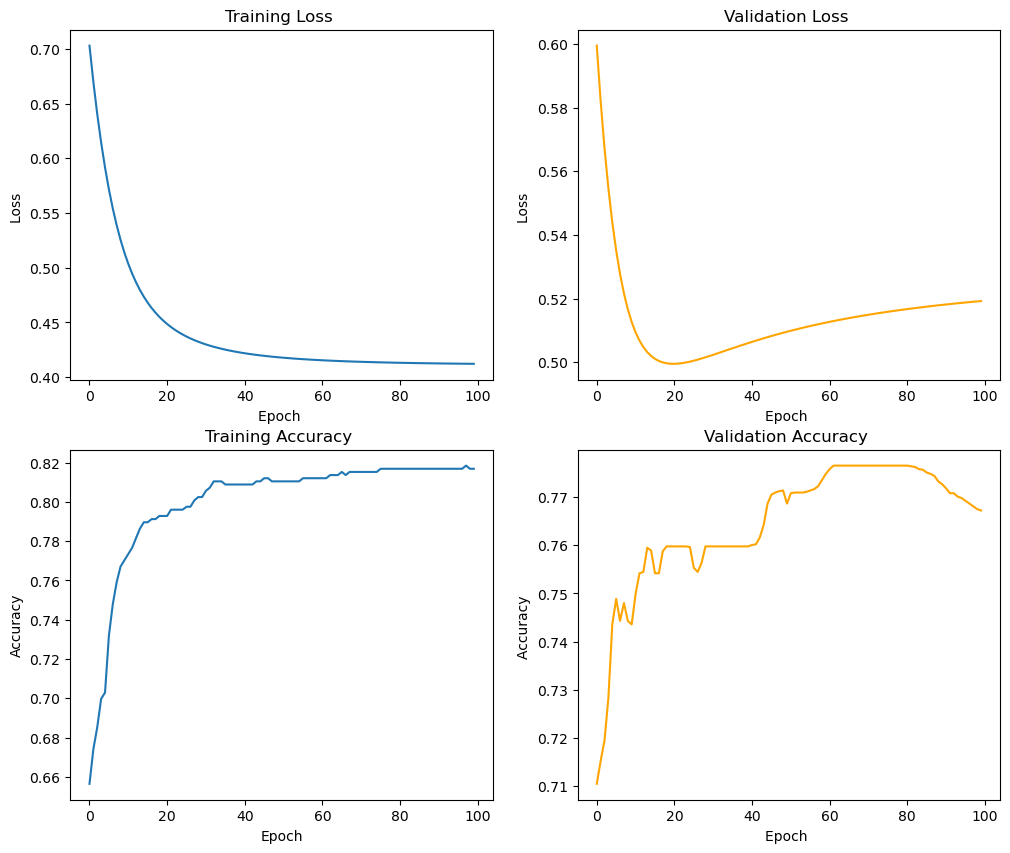

In [51]:
fig , ax = plt . subplots (2 , 2 , figsize =(12 , 10) )
ax [0 , 0]. plot(train_losses)
ax [0 , 0]. set(xlabel ='Epoch ', ylabel ='Loss ')
ax [0 , 0]. set_title ('Training Loss ')
ax [0 , 1]. plot( val_losses , 'orange')
ax [0 , 1]. set( xlabel ='Epoch ', ylabel ='Loss ')
ax [0 , 1]. set_title ('Validation Loss ')

ax [1 , 0]. plot(train_accs)
ax [1 , 0]. set(xlabel ='Epoch', ylabel ='Accuracy')
ax [1 , 0]. set_title ('Training Accuracy ')

ax [1 , 1]. plot ( val_accs , 'orange')
ax [1 , 1]. set ( xlabel ='Epoch ', ylabel ='Accuracy ')
ax [1 , 1]. set_title ('Validation Accuracy ')

plt . show ()

In [52]:
import re
import nltk

from nltk.tokenize import TweetTokenizer
from collections import defaultdict

In [56]:
dataset_path = 'sentiment_analysis.csv'
df = pd.read_csv(dataset_path,
                 index_col='id')

In [57]:
df

,label,tweet
id,,
1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
2,0,Finally a transparant silicon case ^^ Thanks t...
3,0,We love this! Would you go? #talk #makememorie...
4,0,I'm wired I know I'm George I was made that wa...
5,1,What amazing service! Apple won't even talk to...
...,...,...
7916,0,Live out loud #lol #liveoutloud #selfie #smile...
7917,0,We would like to wish you an amazing day! Make...
7918,0,Helping my lovely 90 year old neighbor with he...


In [58]:
def preprocess_text(text):
    text = re.sub(r'^RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub (r'[^\ w\s]', '', text )
    
    tokenizer = TweetTokenizer(
        preserve_case=False, strip_handles=True, reduce_len=True
    )
    text = tokenizer.tokenize(text)
    return text 

In [64]:
def get_freqs(df):
    freqs = defaultdict(lambda: 0)
    for idx,row in df.iterrows():
        tweet = row['tweet']
        label = row['label']
        tokens = preprocess_text(tweet)
        for token in tokens:
            pair = (token, label)
            freqs[pair] += 1
    
    return freqs

In [65]:
def get_feature(text, freqs):
    tokens = preprocess_text(text)
    X = np.zeros(3)
    X[0] = 1
    for token in tokens:
        X[1] += freqs[(token,0)]
        X[2] += freqs[(token,1)]
    return X

In [66]:
X = []
y = []
freqs = get_freqs(df)
for idx, row in df.iterrows():
    tweet = row['tweet']
    label = row['label']
    
    X_i = get_feature(tweet, freqs)
    X.append(X_i)
    y.append(label)
    
X = np.array(X)
y = np.array(y)

In [67]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=val_size, random_state=random_state,shuffle=is_shuffle)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=test_size, random_state=random_state)


In [68]:
standard = StandardScaler()
X_train[:,1:] = standard.fit_transform(X_train[:,1:])
X_test[:,1:] = standard.transform(X_test[:,1:])
X_val[:,1:] = standard.transform(X_val[:,1:])

In [70]:
lr = 0.01
epochs = 200
batch_size = 128

np.random.seed(random_state)
theta = np.random.uniform(size=X_train.shape[1])

In [71]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
    train_batch_accs = []
    train_batch_losses = []
    val_batch_accs = []
    val_batch_losses = []

    for i in range(0, X_train.shape[0], batch_size):
        X_i = X_train[i:i+batch_size]
        y_i = y_train[i:i+batch_size]
        y_hat = predict(X_i, theta)
        train_loss = compute_loss(y_hat, y_i)
        gradient = compute_gradient(X_i, y_i, y_hat)
        theta = update_theta(theta, gradient, lr)

        train_batch_accs.append(accuracy(X_i, y_i, theta))
        train_batch_losses.append(train_loss)

        y_val_hat = predict(X_val, theta)
        val_loss = compute_loss(y_val_hat, y_val)
        val_batch_accs.append(accuracy(X_val, y_val, theta))
        val_batch_losses.append(val_loss)

    train_batch_loss = sum(train_batch_losses)/ len(train_batch_losses)
    val_batch_loss = sum(val_batch_losses)/ len(val_batch_losses)
    train_batch_acc = sum(train_batch_accs)/ len(train_batch_accs)
    val_batch_acc = sum(val_batch_accs)/ len(val_batch_accs)

    train_losses.append(train_batch_loss)
    train_accs.append(train_batch_acc)
    val_losses.append(val_batch_loss)
    val_accs.append(val_batch_acc)
    print(f'epoch : {epoch+1} | train loss : {train_batch_loss} | train acc : {train_batch_acc} | validation loss : {val_batch_loss} | validation acc : {val_batch_acc}')

epoch : 1 | train loss : 0.8236174556042998 | train acc : 0.44946732954545454 | validation loss : 0.8246515292831382 | validation acc : 0.45328282828282834
epoch : 2 | train loss : 0.7733511517225203 | train acc : 0.44946732954545454 | validation loss : 0.7738801454050754 | validation acc : 0.45328282828282834
epoch : 3 | train loss : 0.7326140534978074 | train acc : 0.47528409090909096 | validation loss : 0.7328981602625068 | validation acc : 0.4754361799816349
epoch : 4 | train loss : 0.7000267862111584 | train acc : 0.5947798295454546 | validation loss : 0.7002496186960092 | validation acc : 0.5763888888888892
epoch : 5 | train loss : 0.6741671234963298 | train acc : 0.5988636363636364 | validation loss : 0.6744440968900728 | validation acc : 0.5842946510560151
epoch : 6 | train loss : 0.653714816442058 | train acc : 0.6693536931818183 | validation loss : 0.6541103822497197 | validation acc : 0.6653609963269058
epoch : 7 | train loss : 0.6375342536980877 | train acc : 0.693039772727

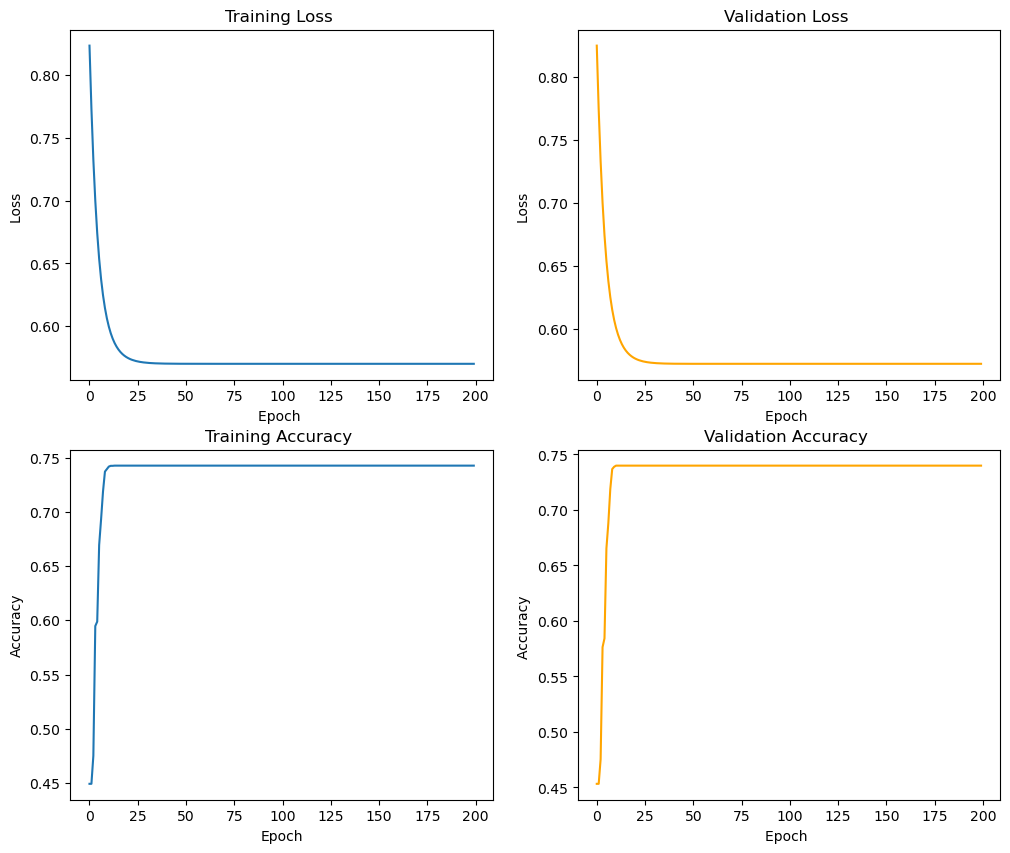

In [72]:
fig , ax = plt . subplots (2 , 2 , figsize =(12 , 10) )
ax [0 , 0]. plot(train_losses)
ax [0 , 0]. set(xlabel ='Epoch ', ylabel ='Loss ')
ax [0 , 0]. set_title ('Training Loss ')
ax [0 , 1]. plot( val_losses , 'orange')
ax [0 , 1]. set( xlabel ='Epoch ', ylabel ='Loss ')
ax [0 , 1]. set_title ('Validation Loss ')

ax [1 , 0]. plot(train_accs)
ax [1 , 0]. set(xlabel ='Epoch', ylabel ='Accuracy')
ax [1 , 0]. set_title ('Training Accuracy ')

ax [1 , 1]. plot ( val_accs , 'orange')
ax [1 , 1]. set ( xlabel ='Epoch ', ylabel ='Accuracy ')
ax [1 , 1]. set_title ('Validation Accuracy ')

plt . show ()

In [73]:
y = np.array([1,0,0,1])
y_hat = np.array([0.8, 0.75, 0.3, 0.95])
compute_loss(y_hat, y)

0.5043515376900958

In [76]:
X = np.array([[1, 2], [2, 1], [1, 1], [2, 2]])
y = np.array([0,1,0,1])
y_pred = np.array([0.25, 0.75, 0.4, 0.8])
compute_gradient(X, y, y_pred)

array([-0.0625,  0.0625])

In [77]:
X = np.array([[1, 3], [2, 1], [3, 2], [1, 2]])
y = np.array([1,0,1,1])
y_pred = np.array([0.7, 0.4, 0.6, 0.85])
compute_gradient(X, y, y_pred)

array([-0.2125, -0.4   ])